### Lab 2: Hyponyms and Hypernyms
Tasks at the bottom of notebook
The installation of pygraphviz for windows is following:

1) Install binaries https://graphviz.gitlab.io/_pages/Download/Download_windows.html

2) Install prebuilt wheel for your python version https://github.com/CristiFati/Prebuilt-Binaries/tree/master/PyGraphviz/v1.5/Graphviz-2.42.2

3) Add to env var PATH the value "C:\Program Files (x86)\Graphviz2.38\bin"

Other packages can be installed through pip

In [18]:
import pandas as pd
import wikipedia
import os
from tqdm import tqdm
from joblib import Parallel, delayed
import multiprocessing
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from ipywidgets import interact, interactive, fixed, interact_manual,widgets
from IPython.display import display
import json
num_cores = multiprocessing.cpu_count()
print(num_cores)
wikipedia.set_lang("ru")
DATA_PATH_LIST = ['.']
EMBEDDING_MODEL_FILENAME = "wiki_node2vec.bin"
DATA_PATH="/".join(DATA_PATH_LIST+["synsets_nouns.tsv"])
df = pd.read_csv(DATA_PATH,sep='\t')
%matplotlib inline

8


In [19]:
df

,SYNSET_ID,TEXT,PARENTS,PARENT_TEXTS
0,126551-N,КРЕСТНЫЙ ОТЕЦ,"['2553-N', '153536-N', '2453-N']","['СОВЕРШЕННОЛЕТНИЕ ЛИЦА, СОВЕРШЕННОЛЕТНИЙ ГРАЖ..."
1,126551-N,КРЕСТНЫЙ ОТЕЦ,"['4544-N', '147272-N']","['ВЕРУЮЩИЙ В ХРИСТА, БРАТЬЯ ВО ХРИСТЕ, ХРИСТИА..."
2,120440-N,"УСМЕШКА, УХМЫЛКА","['112037-N', '112039-N', '126984-N']","['ВЫРАЖЕНИЕ ЛИЦА, ВЫРАЖЕНИЕ, МИНА, ВЫРАЖЕНИЕ Н..."
3,120440-N,"УСМЕШКА, УХМЫЛКА","['141697-N', '116284-N']","['ПРЕПОДНЕСЕНИЕ, ПРЕДСТАВЛЕНИЕ', 'ОСМЕИВАНИЕ, ..."
4,1277-N,"БАЛАНС ДОХОДОВ И РАСХОДОВ, ОТЧЕТ О ДОХОДАХ И Р...","['3197-N', '107671-N', '134606-N']","['БУХГАЛТЕРСКИЙ ДОКУМЕНТ, ДОКУМЕНТ БУХГАЛТЕРСК..."
...,...,...,...,...
17237,131787-N,"ИНФАНТИЛЬНОСТЬ, ИНФАНТИЛИЗМ","['616-N', '3949-N']","['НЕДОМОГАНИЕ, ЗАБОЛЕВАНИЕ ЧЕЛОВЕКА, ЗАБОЛЕВАН..."
17238,142357-N,"НЕРВНАЯ ДЕПРЕССИЯ, ДЕПРЕССИВНОЕ РАССТРОЙСТВО, ...","['616-N', '3949-N']","['НЕДОМОГАНИЕ, ЗАБОЛЕВАНИЕ ЧЕЛОВЕКА, ЗАБОЛЕВАН..."
17239,144031-N,"АУТИЗМ, АУТИСТИЧЕСКОЕ МЫШЛЕНИЕ","['616-N', '3949-N']","['НЕДОМОГАНИЕ, ЗАБОЛЕВАНИЕ ЧЕЛОВЕКА, ЗАБОЛЕВАН..."
17240,147153-N,"АНОРЕКСИЯ, НЕРВНАЯ АНОРЕКСИЯ","['616-N', '3949-N']","['НЕДОМОГАНИЕ, ЗАБОЛЕВАНИЕ ЧЕЛОВЕКА, ЗАБОЛЕВАН..."


In [20]:
def prestr(x):
    return str(x).replace('\"','').replace("'",'"')

In [21]:
class DefDict(defaultdict):
    def __missing__(self, key):
        self[key] = key
        return key
    
idx2syns = DefDict(lambda x:x)
for val in df.values:
    idx2syns[val[0]]=val[1]
    try:
        pidxs = json.loads(prestr(val[2]))
        concp = [el.split(",")[0] for el in json.loads(prestr(val[3]))]
        idx2syns.update(dict(zip(pidxs,concp)))
    except:
        print(prestr(val[2]))


### Interactive visualization of hyponyms and hypernyms

Button(description='Draw', style=ButtonStyle())

Text(value='МАТЬ', description='String:', placeholder='Query')

graphdraw гайморит
['ГАЙМОРИТ']


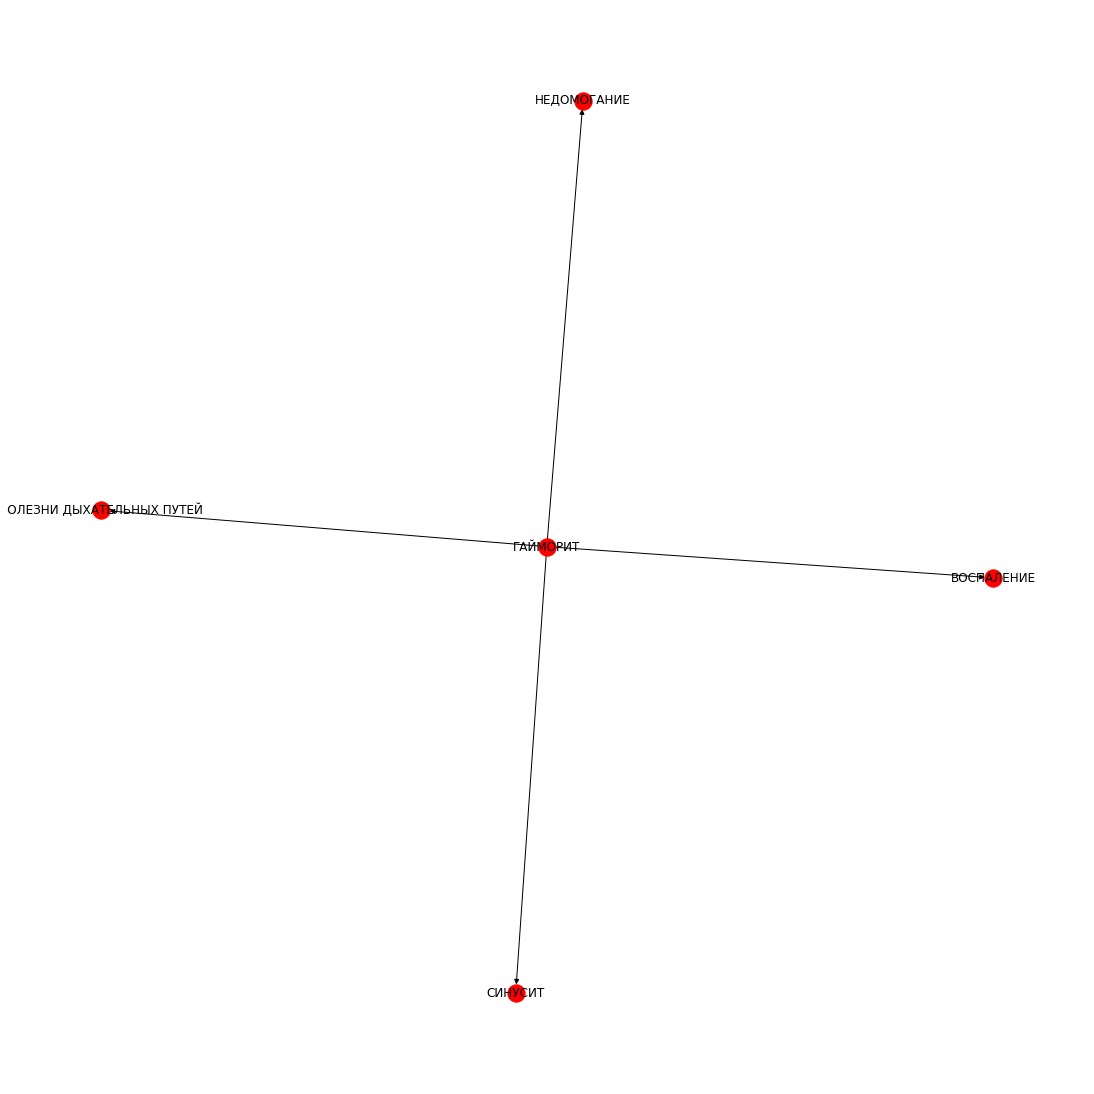

graphdraw аритмия
['ПЕРЕБОИ В РИТМЕ СЕРДЦА', ' ПЕРЕБОИ В РАБОТЕ СЕРДЦА', ' АРИТМИЯ', ' НАРУШЕНИЕ СЕРДЕЧНОГО РИТМА', ' СЕРДЕЧНАЯ АРИТМИЯ']
['ПЕРЕБОИ В РИТМЕ СЕРДЦА', ' ПЕРЕБОИ В РАБОТЕ СЕРДЦА', ' АРИТМИЯ', ' НАРУШЕНИЕ СЕРДЕЧНОГО РИТМА', ' СЕРДЕЧНАЯ АРИТМИЯ']


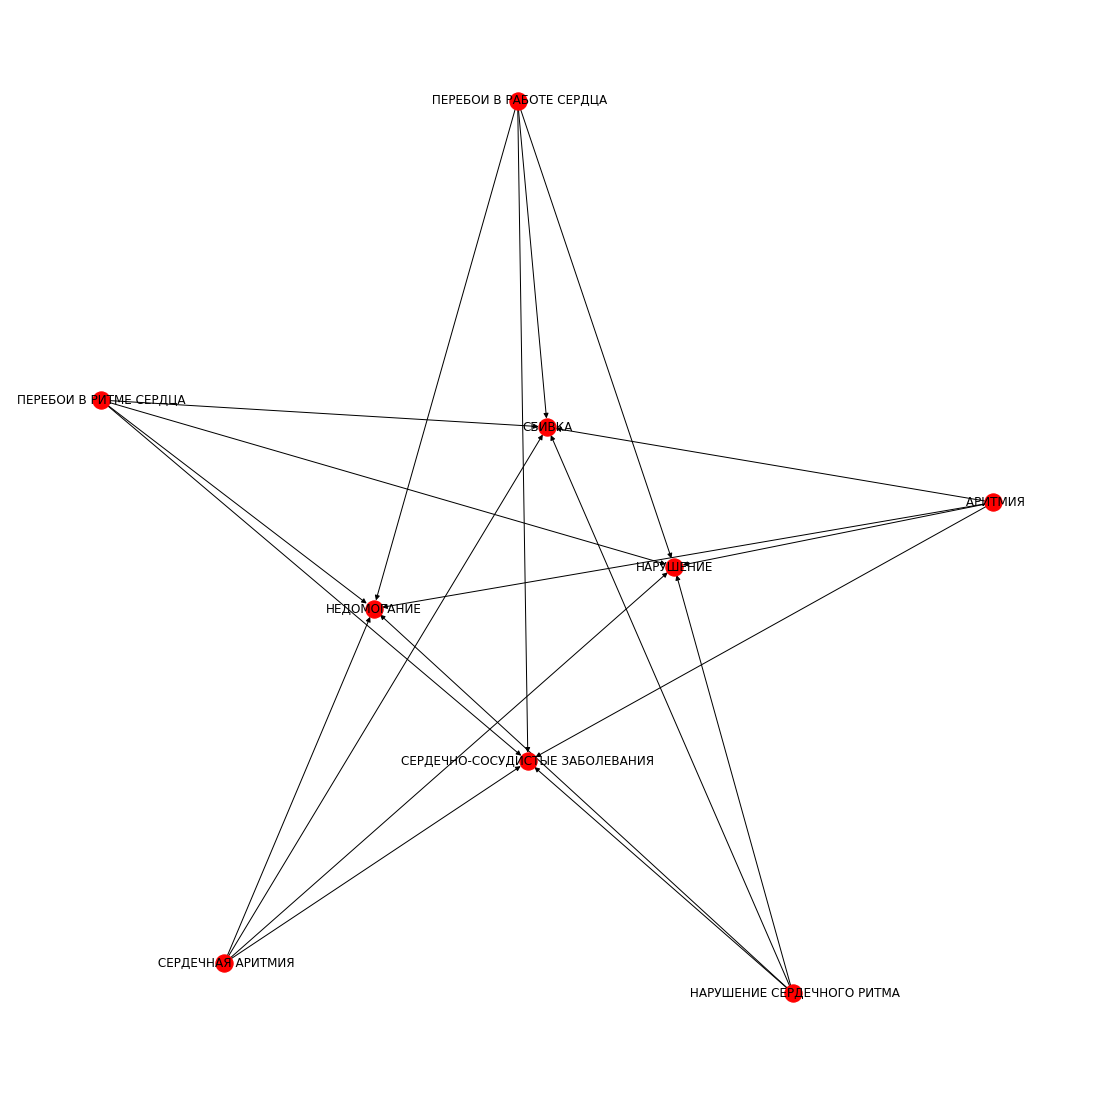

In [26]:
button = widgets.Button(description="Draw")
query = widgets.Text(
    value='МАТЬ',
    placeholder='Query',
    description='String:',
    disabled=False
)
display(button,query)




def creategraph(df):
    res = []
    for row in df.values:
        cohyps = row[1].split(",")
        for idx,cohyp in enumerate(cohyps):
            for parent in json.loads(prestr(row[2])):
                res.append((row[0]+'-'+str(idx),parent))
    return res

def graphdraw(b):
    print("graphdraw",query.value)
    subset = df[df['TEXT'].str.contains(query.value.upper())]
    g = nx.DiGraph()
    for el in subset.values:
        cohyps = el[1].split(",")
        print(cohyps)
        syns = idx2syns[el[0]]
        for child in cohyps:
            for parent in json.loads(prestr(el[2])):
                ed = g.add_edge(child,idx2syns[parent],label="is a")
            
    plt.figure(figsize=(15,15))
    pos = nx.nx_agraph.graphviz_layout(g)
    nx.draw(g,with_labels=True,pos=pos)
#     edge_labels=nx.draw_networkx_edge_labels(g,pos=pos)
    plt.show()
button.on_click(graphdraw)

### Pattern extractor

Yargy — библиотека для извлечения структурированной информации из текстов на русском языке. Правила описываются контекстно-свободными грамматиками и словарями ключевых слов. Банк готовых правил для имён, дат, адресов и других сущностей доступен в репозитории Natasha.
* https://yargy.readthedocs.io/ru/latest/
* http://pymorphy2.readthedocs.io/en/latest/user/grammemes.html
* https://github.com/natasha/natasha

### Токенизатор

In [6]:
from yargy.tokenizer import MorphTokenizer


tokenizer = MorphTokenizer()
text = '''Ростов-на-Дону
Длительностью 18ч. 10мин.
Яндекс.Такси
π ≈ 3.1415
1 500 000$
http://vk.com
'''
for line in text.splitlines():
    print([_.value for _ in tokenizer(line)])

['Ростов', '-', 'на', '-', 'Дону']
['Длительностью', '18', 'ч', '.', '10', 'мин', '.']
['Яндекс', '.', 'Такси']
['π', '≈', '3', '.', '1415']
['1', '500', '000', '$']
['http', ':', '/', '/', 'vk', '.', 'com']


# Газеттир
Газеттир нужен для удобной работы с последовательностью слов. Например, можно написать:

In [7]:
from yargy import or_, rule
from yargy.predicates import normalized

RULE = or_(
    rule(normalized('dvd'), '-', normalized('диск')),
    rule(normalized('видео'), normalized('файл'))
)

In [8]:
from yargy import Parser
from yargy.pipelines import morph_pipeline


RULE = morph_pipeline([
    'dvd-диск',
    'видео файл',
    'видеофильм',
    'газета',
    'электронный дневник',
    'эссе',
])

parser = Parser(RULE)
text = 'Видео файл на dvd-диске'
for match in parser.findall(text):
    print([_.value for _ in match.tokens])

['Видео', 'файл']
['dvd', '-', 'диске']


In [9]:
from yargy import Parser, rule, and_
from yargy.predicates import gram, is_capitalized, dictionary


GEO = rule(
    and_(
        gram('ADJF'),  # так помечается прилагательное, остальные пометки описаны в
                       # http://pymorphy2.readthedocs.io/en/latest/user/grammemes.html
        is_capitalized()
    ),
    gram('ADJF').optional().repeatable(),
    dictionary({
        'федерация',
        'республика'
    })
)


parser = Parser(GEO)
text = '''
В Чеченской республике на день рождения ...
Донецкая народная республика провозгласила ...
Башня Федерация — одна из самых высоких ...
'''
for match in parser.findall(text):
    print([_.value for _ in match.tokens])

['Чеченской', 'республике']
['Донецкая', 'народная', 'республика']


### Предикаты

Предикат — функция, которая принимает на вход токен и возвращает True или False. В Yargy встроено много готовых предикатов. Полный список есть в справочнике. Предикаты комбинируются с помощью and_, or_ и not_.

In [10]:
from yargy import and_, not_
from yargy.tokenizer import MorphTokenizer
from yargy.predicates import is_capitalized, eq


tokenizer = MorphTokenizer()
token = next(tokenizer('Стали'))

predicate = is_capitalized()
print(predicate(token))

predicate = and_(
    is_capitalized(),
    not_(eq('марки'))
)
print(predicate(token))

True
True


### Грамматики
В Yargy используется специальный DSL для описания грамматик. Любую контекстно-свободную грамматику можно описать с помощью конструкций Питона. Например, есть примитивная грамматика для размеров одежды:

KEY -> р. | размер

VALUE -> S | M | L

SIZE -> KEY VALUE



In [11]:
from yargy import rule, or_


KEY = or_(
    rule('р', '.'),
    rule('размер')
).named('KEY')
VALUE = or_(
    rule('S'),
    rule('M'),
    rule('L'),
    rule('XS'),
).named('VALUE')
SIZE = rule(
    KEY,
    VALUE
).named('SIZE')
SIZE.normalized.as_bnf

SIZE -> KEY VALUE
KEY -> 'р' '.' | 'размер'
VALUE -> 'S' | 'M' | 'L' | 'XS'


In [12]:
parser = Parser(
    SIZE
)
text = 'размер M; размер A; размер XS;'
for match in parser.findall(text):
    print([_.value for _ in match.tokens])

['размер', 'M']
['размер', 'XS']


In [13]:
from yargy import Parser, rule, and_, or_, not_
from yargy.interpretation import fact, attribute
from yargy.predicates import gram, is_capitalized, dictionary, eq
import re
import pandas as pd
from tqdm import tqdm_notebook
from gensim import utils

In [14]:

START = rule(
    or_(
        rule(gram('ADJF')),
        rule(gram('NOUN'))
    ).optional(),
    gram('NOUN')
)

START_S = or_(
    eq('такой'),
    eq('такие'),
)

KAK = eq('как')
INCLUDING = or_(
    or_(
        eq('в'),
        eq('том'),
        eq('числе'),
    ),
    eq('включающий'),
    or_(
        eq('включающий'),
        eq('в'),
        eq('себя'),
    ),
    or_(
        eq('включающие'),
        eq('в'),
        eq('себя'),
    ),
    eq('включающие'),
    eq('особенно'),

)

MID_S = or_(
    rule(
        or_(
            eq('такой'),
            eq('такие'),
        ),
        eq('как')
    )
)
ATAKJE = rule(
    eq(','),
    eq('а'),
    eq('также')
)

MID = or_(
    rule(
        eq('это')
    ),
    rule(
        eq('—')
    ),
    rule(
        eq('—'),
        eq('это')
    ),
    rule(
        eq('—'),
        not_(eq('км'))
    ),
    rule(
        or_(
            eq('и'),
            eq('или'),
        ),
        eq('другие')
    )
)

END = or_(
    rule(
        gram('NOUN'),
        gram('NOUN')
    ),
    rule(
        gram('ADJF').repeatable(),
        gram('NOUN')
    ),
    rule(
        gram('ADJF'),
        gram('ADJF').repeatable(),
        gram('NOUN')
    ),
    rule(
        gram('NOUN').repeatable(),
        gram('ADJF'),
        gram('NOUN').repeatable()
    ),
    rule(
        gram('NOUN').repeatable()
    )
)

Item = fact(
    'Item',
    [attribute('titles').repeatable()]
)


IGNORE = rule(
    '(',
    not_(eq(')')).repeatable(),
    ')'
)

ITEM = rule(
    IGNORE.interpretation(
        Item.titles
    ),
    eq(',').optional() 
).repeatable().interpretation(
    Item
)

In [15]:
def get_hyperonyms(main_word):
    HYPONYM = eq(utils.deaccent(main_word))
    RULE = or_(
        rule(HYPONYM, ATAKJE, START, MID, END),
        rule(HYPONYM, MID, END),
        rule(START_S, END, KAK, HYPONYM),
        rule(END, INCLUDING, HYPONYM)
    )
    parser = Parser(RULE) 
    text = utils.deaccent(wikipedia.summary(main_word))
    print(text)
    text = re.sub(r'\(.+?\)', '', text)
    text = text.lower().replace('* сергии радонежскии* ', '')
    for idx, match in enumerate(parser.findall(text.lower())):
        k = [_.value for _ in match.tokens]
        print(k)

In [16]:
get_hyperonyms("банан")

Банан — название съедобных плодов культивируемых растении рода Банан (Musa); обычно под таковыми понимают Musa acuminata и Musa × paradisiaca, а также Musa balbisiana, Musa fehi, Musa troglodytarum и ряд других. Также бананами могут называть плоды Ensete ventricosum (строго говоря, являющегося представителем другого рода семеиства Банановые). С ботаническои точки зрения банан является ягодои, многосеменнои и толстокожеи. У культурных форм часто отсутствуют семена, ненужные при вегетативном размножении. Плоды имеют длину 6—30 см и диаметр 2—5 см. Соплодия могут состоять из 300 плодов и иметь массу до 50—60 кг.
Бананы — одна из древнеиших пищевых культур, а для тропических стран важнеишее пищевое растение и главная статья экспорта. Спелые бананы широко употребляются в пищу по всему миру, их используют при приготовлении большого количества блюд. Помимо употребления в свежем виде, в кухне некоторых народов бананы могут зажариваться, или вариться как в очищенном, так и в неочищенном виде. И

#### Task 1 (deadline 19.02.2020 24:00)
* Find your name on the spreadsheet https://docs.google.com/spreadsheets/d/1RR2I6toCkebbGU1UK83HS70Ru_l0_o-nnZIHyiFB0No/edit?usp=sharing. In opposite of your name there are 24 words of hyponyms, you have to insert five corresponding hypernyms next to them. Examples of hyponyms and hyperonyms relationship you can find above in the current Jupiter notebook.
* Find for each pair of hyponyms and hypernyms a corresponding snippet of a text with their mentions. The source of the text can be any free resources, e.g., Wikipedia, Google, Yandex, others. You should save the snippets and their URLs within the lab2 folder in your NLP git-repo with .csv file-extension in a single file.

#### Task 2 (deadline 26.02.2020 24:00)
* It would be best if you created a pandas DataFrame of the texts from the previous task. And apply to the DataFrame the function 'get_hyperonyms,' which must return the list of the corresponding hypernyms from the text automatically. If there are errors or misses, you should fix them in the code for your case of the 24 words. Nevertheless, it is strictly prohibited to use hard coding. Save your notebook with parser code within the lab2 folder in your NLP git-repo.